# Monkey Stocks

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random

from bs4 import BeautifulSoup
import requests

In [2]:
def get_tickers(setor="Todos"):
    '''
    Essa função obtém os tickers listados no site fundamentus.com.br, seja um setor
    específico, uma lista de setores ou todos os tickers de todos os setores.
    '''
    
    setores = {"Agropecuária": "42", "Água e Saneamento": "33", "Alimentos": "15",
               "Bebidas": "16", "Comércio": "27", "Comércio2": "12",
               "Comércio e Distribuição": "20", "Computadores e Equipamentos": "28",
               "Construção e Engenharia": "13", "Diversos": "26",
               "Embalagens": "6", "Energia Elétrica": "32",
               "Equipamentos Elétricos": "9", "Exploração de Imóveis": "39",
               "Financeiros": "35", "Fumo": "17", "Gás": "34", 
               "Holdings Diversificadas": "40", "Hoteis e Restaurantes": "24",
               "Madeira e Papel": "5", "Máquinas e Equipamentos": "10", 
               "Materiais Diversos": "7", "Material de Transporte": "8",
               "Mídia": "23", "Mineração": "2", "Outros": "41",
               "Petróleo, Gás e Biocombustíveis": "1", "Previdência e Seguros": "38",
               "Prods. de Uso Pessoal e de Limpeza": "18", "Programas e Serviços": "29",
               "Químicos": "4", "Saúde": "19", "Securitizadoras de Recebíveis": "36",
               "Serviços": "11", "Serviços Financeiros Diversos": "37",
               "Siderurgia e Metalurgia": "3", "Tecidos, Vestuário e Calçados": "21",
               "Telefonia Fixa": "30", "Telefonia Móvel": "31", "Transporte": "14",
               "Utilidades Domésticas": "22", "Viagens e Lazer": "25"}

    lista_setores = []
    if setor == "Todos":
        lista_setores = list(setores.keys())
    elif isinstance(setor, str):
        if setores.has_key(setor):
            lista_setores.append(ticker)
        else:
            print("Esse setor não existe")
            return []
    elif isinstance(setor, list):
        lista_setores = setor
    else: 
        return []
    
    tickers = []

    for item in lista_setores:
        try:
            url = "https://www.fundamentus.com.br/resultado.php?setor=" + setores[item]
            response = requests.get(url)
        except:
            print("Não foi possível coletar informações do setor: " + item)
            continue

        soup = BeautifulSoup(response.text, "html.parser")
        tickers_bruto = soup.find('tbody').find_all("a")
        for ticker in tickers_bruto:
            tickers.append(ticker.string + '.SA')
        
    tickers.sort()
    return tickers

In [3]:
# tickers e random tickers
tickers = get_tickers()

In [5]:
start="2019-01-01"
end="2019-12-31"
data = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  402 of 402 completed

4 Failed downloads:
- MDNE3.SA: Data doesn't exist for startDate = 1546308000, endDate = 1577761200
- PRNR3.SA: Data doesn't exist for startDate = 1546308000, endDate = 1577761200
- MTRE3.SA: Data doesn't exist for startDate = 1546308000, endDate = 1577761200
- LWSA3.SA: Data doesn't exist for startDate = 1546308000, endDate = 1577761200


In [6]:
def assets_return(data, start, end, tickers):
    
    df = data.Close[tickers].loc[start:end].pct_change().dropna()

    df['sum'] = df.sum(axis=1)
    df['mean'] = df.mean(axis=1)
    return df[['sum', 'mean']]

In [7]:
def monkey_stocks(data):

    df = pd.DataFrame()
    
    # a cada semana
    start2 = data.index[0]
    for i in range(4, len(data.index), 4):
        end2 = data.index[i]
        print(f"Calculando semana {start} - {end}")
        
        random_tickers = random.sample(tickers, 5)
        print(f"Tickers = {random_tickers}")
        
        r = assets_return(data, start2, end2, random_tickers)
        
        df = pd.concat([df, r])
        
        start2 = end2
        
    return df

In [15]:
ms = monkey_stocks(data)

Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['RENT3.SA', 'BRGE8.SA', 'CBEE3.SA', 'LWSA3.SA', 'SEER3.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['VULC3.SA', 'IRBR3.SA', 'HAGA4.SA', 'ITSA3.SA', 'CGRA3.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['WSON33.SA', 'AALR3.SA', 'TOTS3.SA', 'BRKM3.SA', 'RNEW11.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['SMLS3.SA', 'RDNI3.SA', 'BEES4.SA', 'MEAL3.SA', 'KLBN11.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['EMBR3.SA', 'BBSE3.SA', 'PLAS3.SA', 'TXRX3.SA', 'ENMT3.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['RANI3.SA', 'TCSA3.SA', 'LAME4.SA', 'BRFS3.SA', 'MNPR3.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['CSAB4.SA', 'MYPK3.SA', 'CESP5.SA', 'TCNO4.SA', 'MULT3.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['KEPL3.SA', 'OIBR3.SA', 'BDLL4.SA', 'GOAU4.SA', 'PNVL4.SA']
Calculando semana 2019-01-01 - 2019-12-31
Tickers = ['EQPA6.SA', 'CTSA4.SA', 'BSEV3.SA', 'TIE

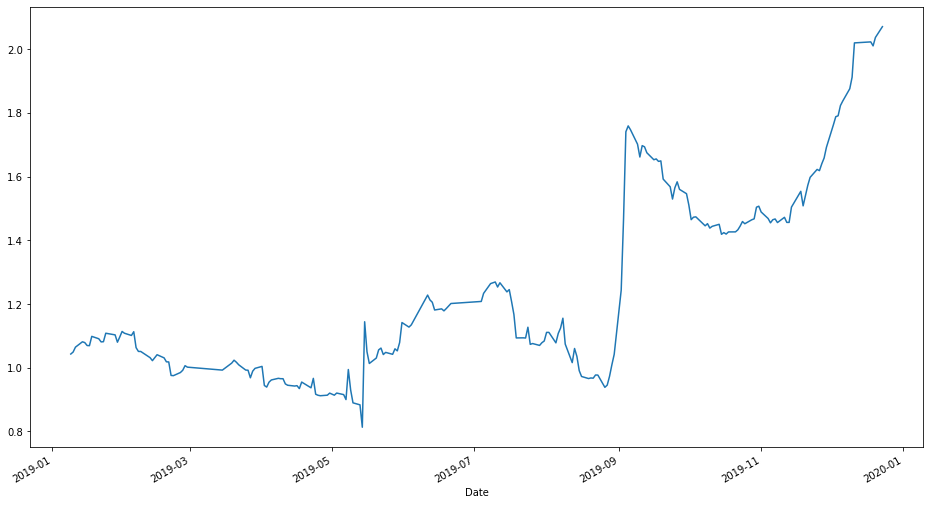

In [16]:
plt.figure(figsize=(16,9))
(1 + ms['mean']).cumprod().plot()